In [1]:
import os
#import sys
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

#sys.path.append('../')
from data.load_data import *
from models.neural_networks import *
from train.train_cnn import *
from train.train_fcn import *
from evaluation.test import *
from utils.others import *
from utils.plot import *
from utils.save_model import *


# Pretrain a CNN

architecture: ConvLayers([(1,16,5,1,2),(16,32,5,1,2)])+ FCN([32 * 7* 7,10])

In [2]:
# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1               
BATCH_SIZE = 50
LR = 0.001             
TSNE = True

In [3]:
#load MNIST dataset
train_loader, test_loader = load_mnist(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))
#load CIFAR-10 dataset

60000
10000


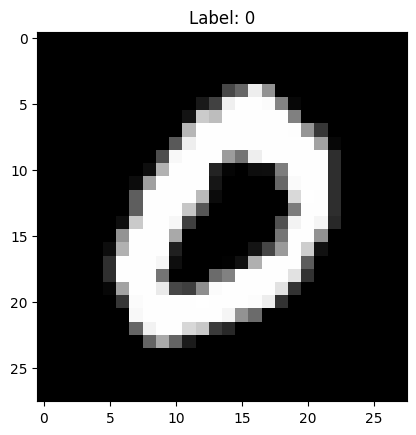

In [4]:
# Plot one example
plot_example(train_loader)

In [5]:
# create model instance
conv = ConvLayers([(1,16,5,1,2),(16,32,5,1,2)])
fcn1 = FCN([32*7*7,10])
#hebbnet = HebbNet([784,50])
#fcn2 = FCN([50,20,10]) 

cnn = CNN(conv, fcn1)
#semihebbnet = SemiHebbNet(hebbnet, fcn2)

In [6]:
# optimizer and loss function
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

Epoch: 0, Step: 0, Loss: 2.362412452697754, Accuracy: 13.19%


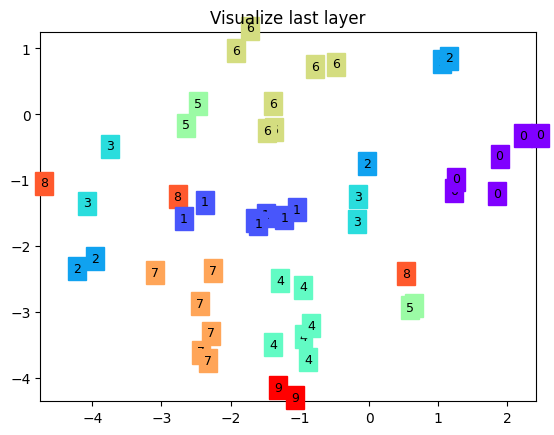

Epoch: 0, Step: 50, Loss: 0.30246978998184204, Accuracy: 86.31%


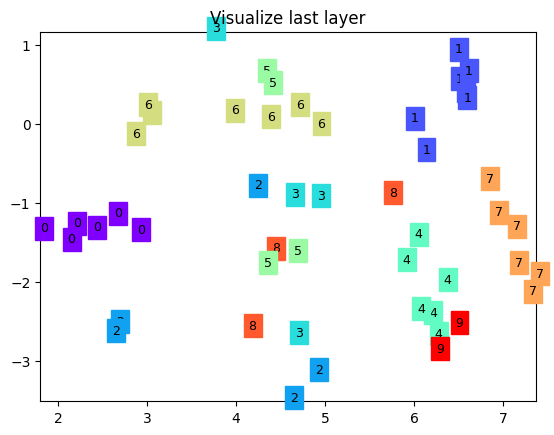

Epoch: 0, Step: 100, Loss: 0.4704747498035431, Accuracy: 93.6%


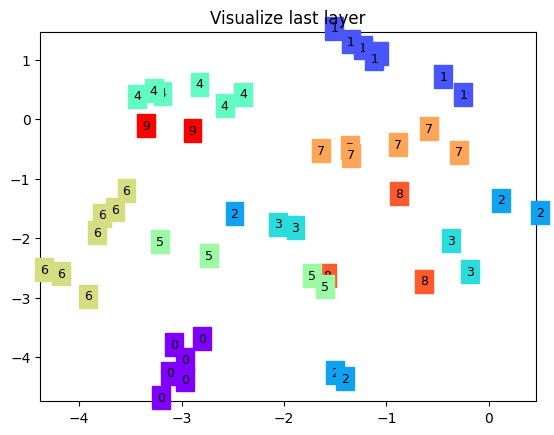

Epoch: 0, Step: 150, Loss: 0.08385691791772842, Accuracy: 93.43%


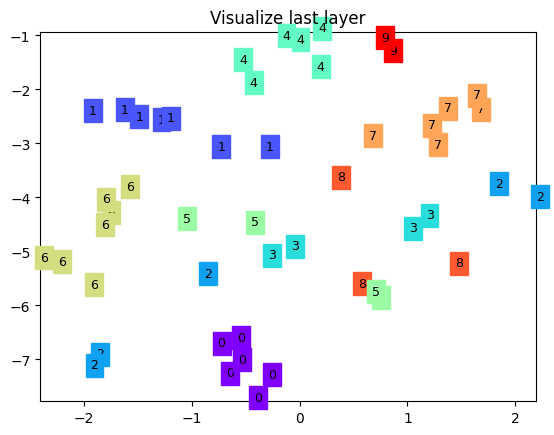

Epoch: 0, Step: 200, Loss: 0.09156502038240433, Accuracy: 96.03%


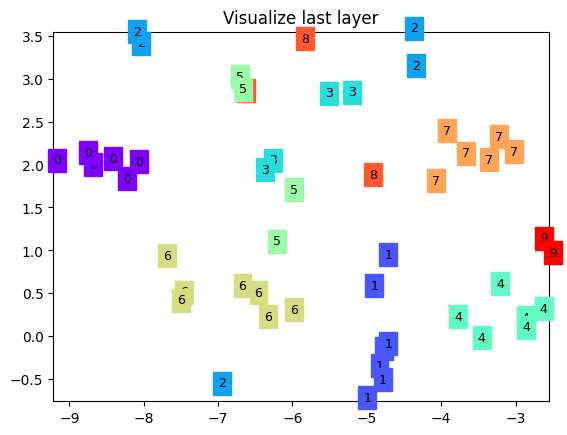

Epoch: 0, Step: 250, Loss: 0.29704153537750244, Accuracy: 96.48%


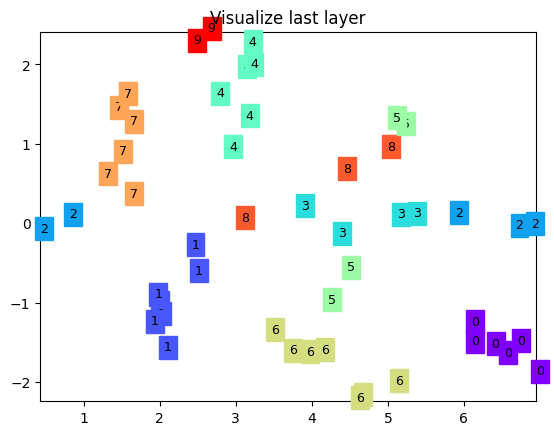

Epoch: 0, Step: 300, Loss: 0.0893189013004303, Accuracy: 96.77%


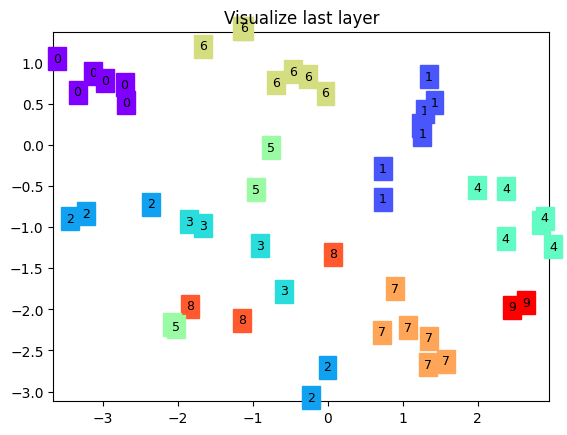

Epoch: 0, Step: 350, Loss: 0.11983921378850937, Accuracy: 97.5%


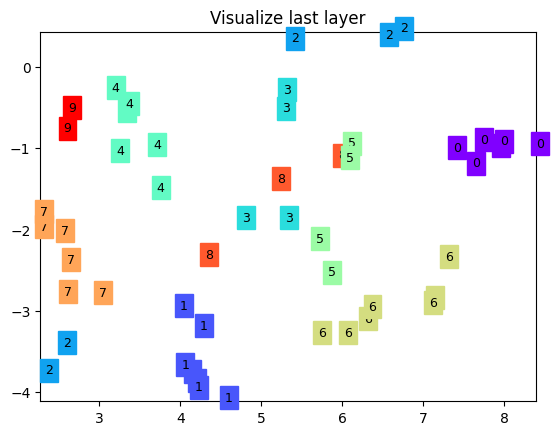

Epoch: 0, Step: 400, Loss: 0.2768186926841736, Accuracy: 97.31%


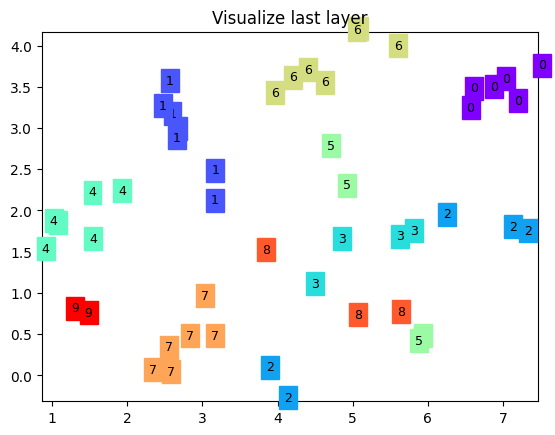

Epoch: 0, Step: 450, Loss: 0.09199879318475723, Accuracy: 97.72%


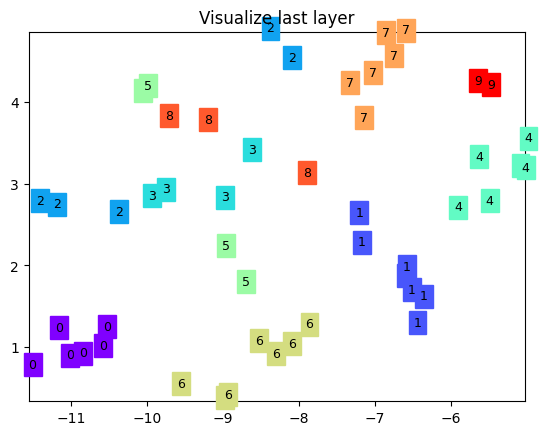

Epoch: 0, Step: 500, Loss: 0.18567869067192078, Accuracy: 97.62%


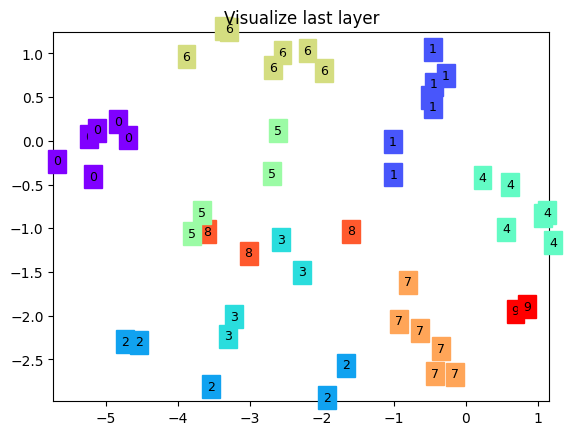

Epoch: 0, Step: 550, Loss: 0.21597614884376526, Accuracy: 98.01%


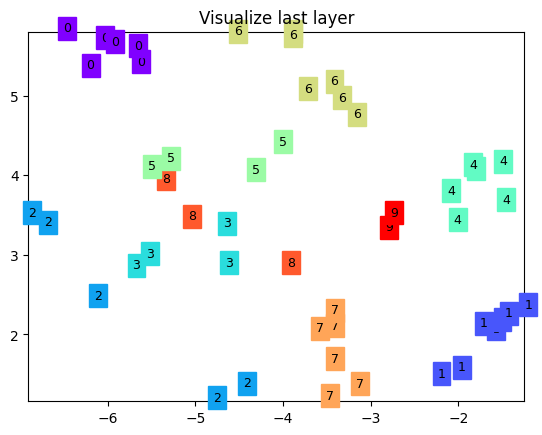

Epoch: 0, Step: 600, Loss: 0.18283958733081818, Accuracy: 97.77%


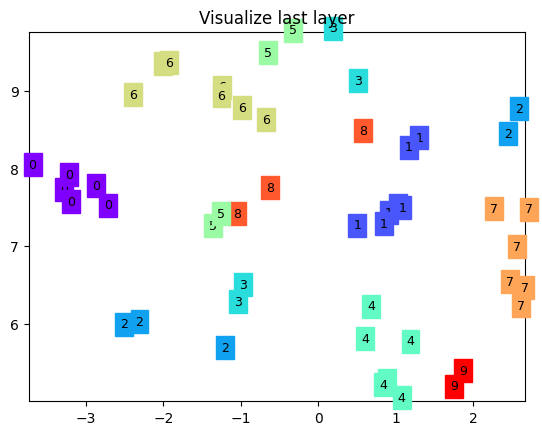

Epoch: 0, Step: 650, Loss: 0.028366362676024437, Accuracy: 97.88%


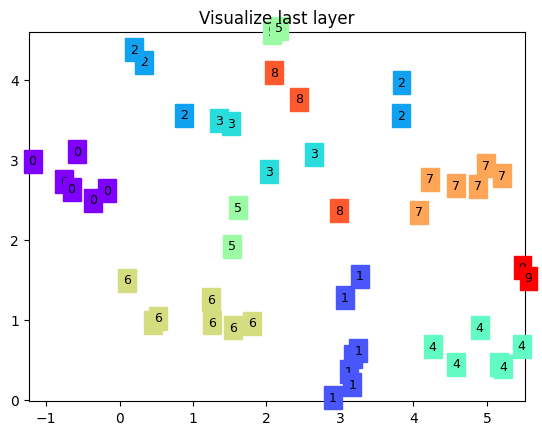

Epoch: 0, Step: 700, Loss: 0.02779393270611763, Accuracy: 97.64%


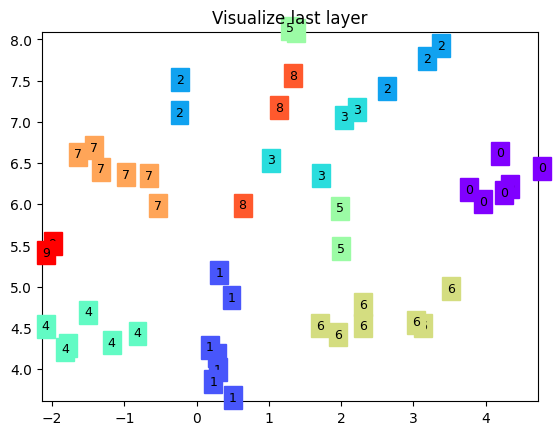

Epoch: 0, Step: 750, Loss: 0.056798648089170456, Accuracy: 98.11%


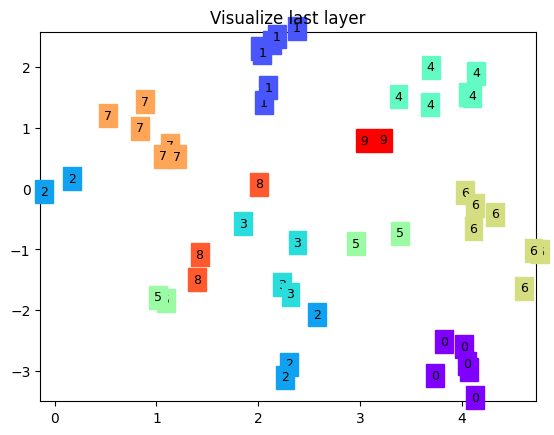

Epoch: 0, Step: 800, Loss: 0.036906927824020386, Accuracy: 98.22%


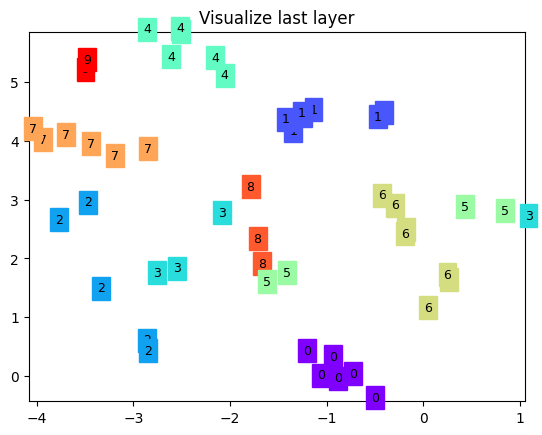

Epoch: 0, Step: 850, Loss: 0.026165468618273735, Accuracy: 98.1%


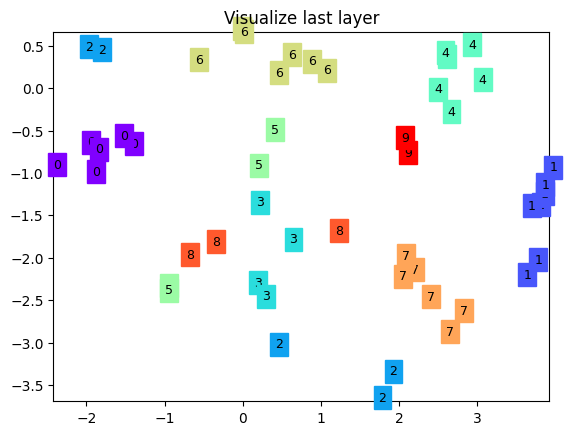

Epoch: 0, Step: 900, Loss: 0.06639423221349716, Accuracy: 97.68%


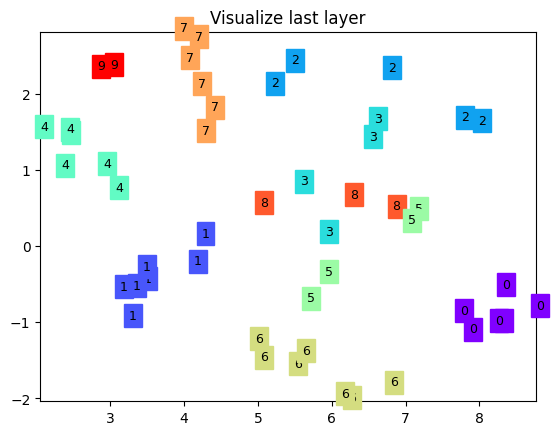

Epoch: 0, Step: 950, Loss: 0.007480353582650423, Accuracy: 98.19%


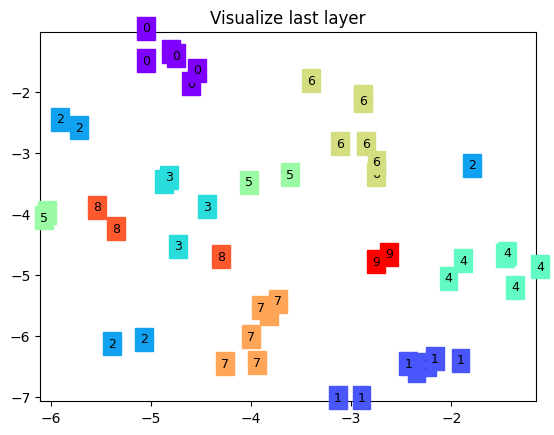

Epoch: 0, Step: 1000, Loss: 0.15270422399044037, Accuracy: 98.34%


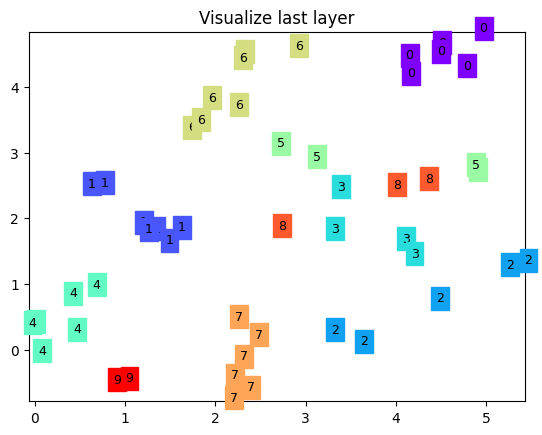

Epoch: 0, Step: 1050, Loss: 0.07587219774723053, Accuracy: 98.25%


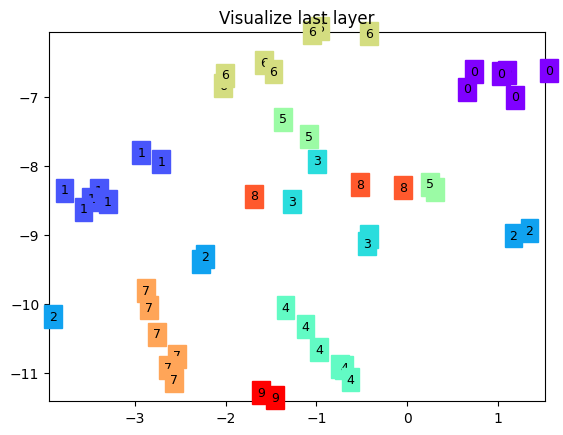

Epoch: 0, Step: 1100, Loss: 0.05095329135656357, Accuracy: 98.45%


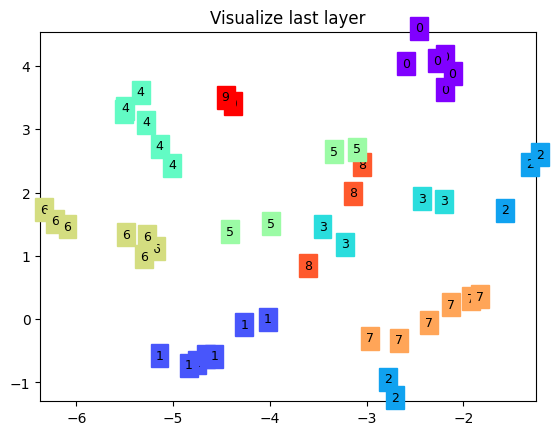

Epoch: 0, Step: 1150, Loss: 0.0346832349896431, Accuracy: 98.52%


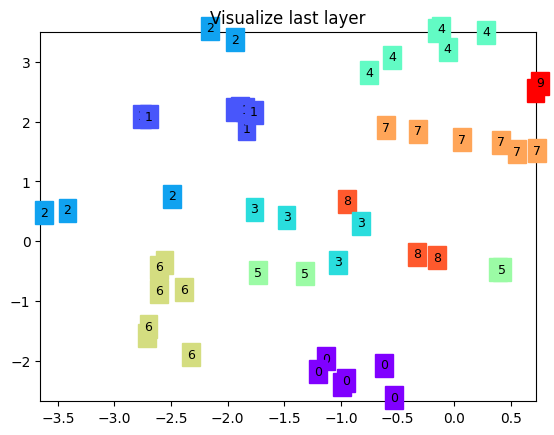

In [7]:
# train networks
train_cnn(model=cnn, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE)

In [8]:
# test accuracy
test_accuracy(model=cnn, dataset='mnist')

Accuracy of the CNN on the MNIST test images: 98.47%


98.47

In [9]:
#save pretrained model
model_save_path = 'pretrained/mnist_models/cnn.pth'
save_model(cnn, model_save_path)

Model saved at pretrained/mnist_models/cnn.pth


In [10]:
#load model and test
new_conv = ConvLayers([(1,16,5,1,2),(16,32,5,1,2)])
new_fcn1 = FCN([32*7*7,10])
pretrained_cnn = CNN(new_conv, new_fcn1, pretrained_model_path=model_save_path)

test_accuracy(model=pretrained_cnn, dataset='mnist')

Accuracy of the CNN on the MNIST test images: 98.47%


98.47

# Pretrain a Shallower CNN

architecture: ConvLayers([(1,8,3,2,1)])+ FCN([8* 7* 7,10])

In [14]:
# create model instance
conv = ConvLayers([(1,8,3,2,1)])
fcn1 = FCN([8*7*7,10])

cnn2 = CNN(conv, fcn1)

In [15]:
# optimizer and loss function
optimizer = torch.optim.Adam(cnn2.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [16]:
# train networks
train_cnn(model=cnn2, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE)

Epoch: 0, Step: 0, Loss: 2.2940406799316406, Accuracy: 12.41%
Epoch: 0, Step: 50, Loss: 1.6877399682998657, Accuracy: 66.39%
Epoch: 0, Step: 100, Loss: 1.1044986248016357, Accuracy: 81.71%
Epoch: 0, Step: 150, Loss: 0.6485647559165955, Accuracy: 85.59%
Epoch: 0, Step: 200, Loss: 0.4553912281990051, Accuracy: 87.55%
Epoch: 0, Step: 250, Loss: 0.4479808807373047, Accuracy: 88.73%
Epoch: 0, Step: 300, Loss: 0.57773357629776, Accuracy: 89.46%
Epoch: 0, Step: 350, Loss: 0.34897392988204956, Accuracy: 90.67%
Epoch: 0, Step: 400, Loss: 0.43525180220603943, Accuracy: 90.67%
Epoch: 0, Step: 450, Loss: 0.31217652559280396, Accuracy: 91.53%
Epoch: 0, Step: 500, Loss: 0.4613203704357147, Accuracy: 92.04%
Epoch: 0, Step: 550, Loss: 0.40748026967048645, Accuracy: 92.37%
Epoch: 0, Step: 600, Loss: 0.4213375151157379, Accuracy: 92.62%
Epoch: 0, Step: 650, Loss: 0.3978551924228668, Accuracy: 92.92%
Epoch: 0, Step: 700, Loss: 0.20192182064056396, Accuracy: 93.18%
Epoch: 0, Step: 750, Loss: 0.28240630030

In [19]:
# test accuracy
test_accuracy(model=cnn2, dataset='mnist')

Accuracy of the CNN on the MNIST test images: 94.5%


94.5

In [17]:
#save pretrained model
model_save_path = 'pretrained/mnist_models/cnn2.pth'
save_model(cnn2, model_save_path)

Model saved at pretrained/mnist_models/cnn2.pth


In [18]:
#load model and test
new_conv = ConvLayers([(1,8,3,2,1)])
new_fcn1 = FCN([8*7*7,10])
pretrained_cnn2 = CNN(new_conv, new_fcn1, pretrained_model_path=model_save_path)

test_accuracy(model=pretrained_cnn2, dataset='mnist')

Accuracy of the CNN on the MNIST test images: 94.5%


94.5

# Pretrain a FCN with comparable parameters as the cnn2

FCN([28*28,8,8,10]) with 6442 trainable weights

In [7]:
fcn = FCN([28*28,8,8,10]) 

In [8]:
# optimizer and loss function
optimizer = torch.optim.Adam(fcn.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [9]:
# train networks
train_fcn(model=fcn, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH)

Epoch: 0, Step: 0, Loss: 2.282907009124756, Accuracy: 11.12%
Epoch: 0, Step: 50, Loss: 1.4978293180465698, Accuracy: 55.53%
Epoch: 0, Step: 100, Loss: 0.9737322926521301, Accuracy: 71.48%
Epoch: 0, Step: 150, Loss: 1.160001277923584, Accuracy: 75.56%
Epoch: 0, Step: 200, Loss: 0.9772011637687683, Accuracy: 80.56%
Epoch: 0, Step: 250, Loss: 0.5750992298126221, Accuracy: 84.65%
Epoch: 0, Step: 300, Loss: 0.3462158441543579, Accuracy: 84.97%
Epoch: 0, Step: 350, Loss: 0.3971533477306366, Accuracy: 86.24%
Epoch: 0, Step: 400, Loss: 0.2845497131347656, Accuracy: 87.24%
Epoch: 0, Step: 450, Loss: 0.9241858124732971, Accuracy: 87.13%
Epoch: 0, Step: 500, Loss: 0.6032810211181641, Accuracy: 87.75%
Epoch: 0, Step: 550, Loss: 0.4403170645236969, Accuracy: 87.81%
Epoch: 0, Step: 600, Loss: 0.32620498538017273, Accuracy: 88.13%
Epoch: 0, Step: 650, Loss: 0.32420849800109863, Accuracy: 88.41%
Epoch: 0, Step: 700, Loss: 0.3733052909374237, Accuracy: 88.76%
Epoch: 0, Step: 750, Loss: 0.19557099044322

In [10]:
# test accuracy
test_accuracy(model=fcn, dataset='mnist', flatten_input=True)

Accuracy of the FCN on the MNIST test images: 89.36%


89.36

In [11]:
#save pretrained model
model_save_path = 'pretrained/mnist_models/fcn.pth'
save_model(fcn, model_save_path)

Model saved at pretrained/mnist_models/fcn.pth


In [13]:
#load model and test

pretrained_fcn = FCN([28*28,8,8,10],pretrained_model_path=model_save_path)
test_accuracy(model=pretrained_fcn, dataset='mnist',flatten_input=True)

Accuracy of the FCN on the MNIST test images: 89.36%


89.36